In [32]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

In [33]:
df_data = pd.read_csv("adult.csv")

In [34]:
df_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
df_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [36]:
df_data["country"].value_counts().index[0]

' United-States'

In [37]:
df_data = df_data.drop(['fnlwgt', 'education-num'], axis = 1)

In [38]:
col_names = df_data.columns

In [39]:
df_data["salary"].value_counts()

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [40]:
import numpy as np

for c in col_names: 
    df_data = df_data.replace("?", np.nan) 
df_data = df_data.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [41]:
category_col =['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
               'race', 'sex', 'country', 'salary']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df_data[col] = labelEncoder.fit_transform(df_data[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'workclass': {' ?': np.int64(0), ' Federal-gov': np.int64(1), ' Local-gov': np.int64(2), ' Never-worked': np.int64(3), ' Private': np.int64(4), ' Self-emp-inc': np.int64(5), ' Self-emp-not-inc': np.int64(6), ' State-gov': np.int64(7), ' Without-pay': np.int64(8)}, 'education': {' 10th': np.int64(0), ' 11th': np.int64(1), ' 12th': np.int64(2), ' 1st-4th': np.int64(3), ' 5th-6th': np.int64(4), ' 7th-8th': np.int64(5), ' 9th': np.int64(6), ' Assoc-acdm': np.int64(7), ' Assoc-voc': np.int64(8), ' Bachelors': np.int64(9), ' Doctorate': np.int64(10), ' HS-grad': np.int64(11), ' Masters': np.int64(12), ' Preschool': np.int64(13), ' Prof-school': np.int64(14), ' Some-college': np.int64(15)}, 'marital-status': {' Divorced': np.int64(0), ' Married-AF-spouse': np.int64(1), ' Married-civ-spouse': np.int64(2), ' Married-spouse-absent': np.int64(3), ' Never-married': np.int64(4), ' Separated': np.int64(5), ' Widowed': np.int64(6)}, 'occupation': {' ?': np.int64(0), ' Adm-clerical': np.int64(1), ' A

Text(0.5, 1.0, '<=50K Income vs >50K Income Count')

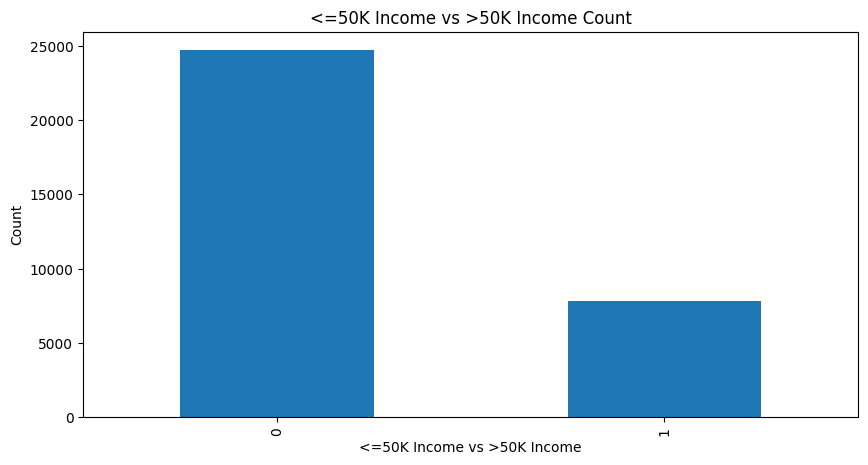

In [42]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = df_data.salary.value_counts().plot(kind = 'bar')
plt.xlabel("<=50K Income vs >50K Income")
plt.ylabel("Count")
plt.title("<=50K Income vs >50K Income Count")

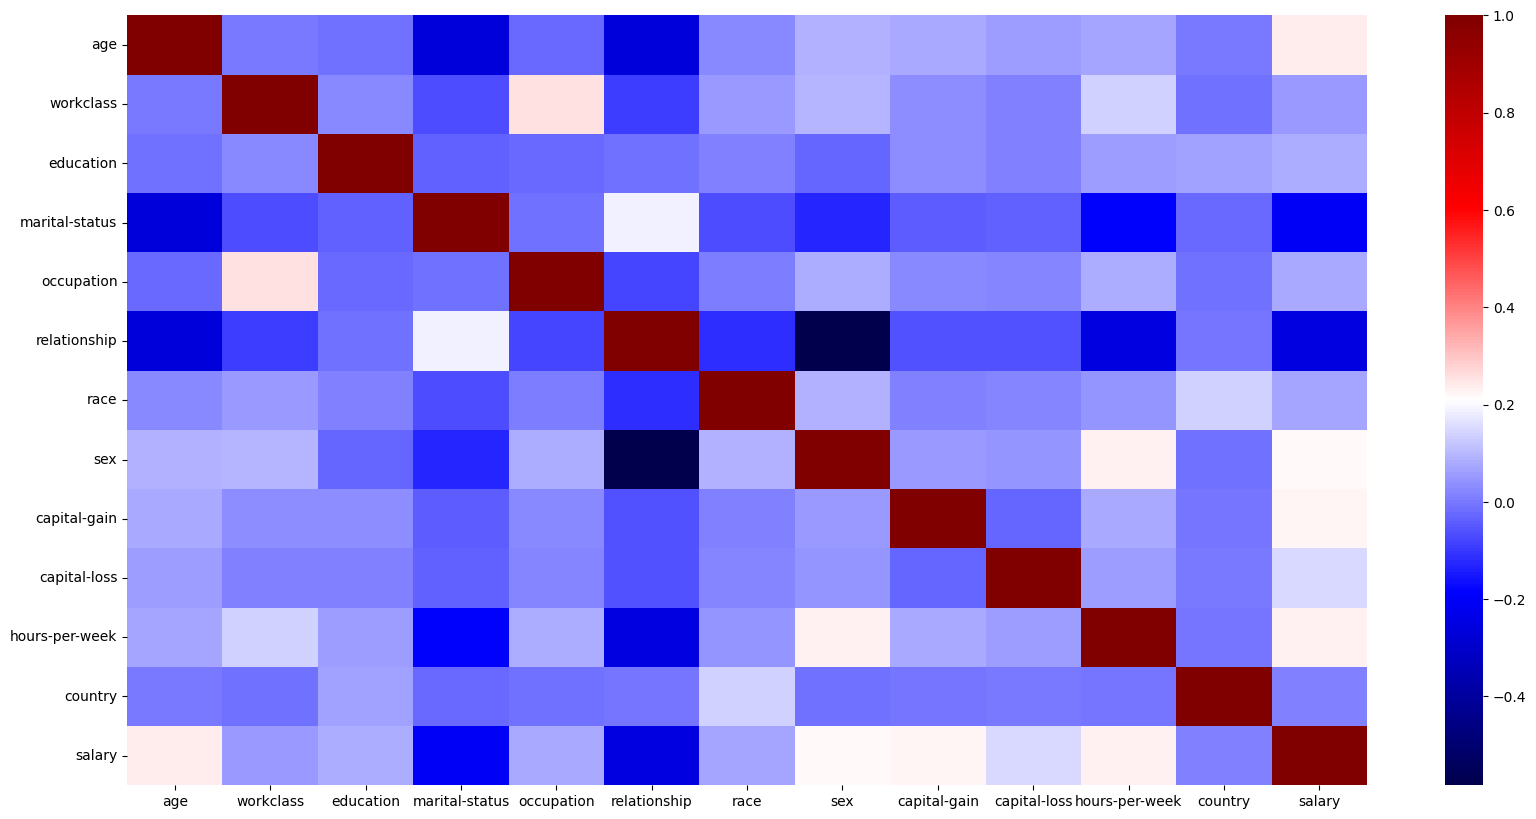

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_data.corr(), cmap="seismic")
plt.show()

In [44]:
X = df_data.drop('salary', axis = 1) 
Y = df_data['salary']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

In [46]:
import pandas as pd

# Adjust filename if it's not "adult.csv"
df_data = pd.read_csv("adult.csv")


In [47]:
print(df_data.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')


In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as pl

In [49]:
df_data = pd.read_csv("adult.csv") 

In [50]:
print(df_data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')


In [51]:
X = df_data.drop("salary", axis=1)

In [52]:
X = X.apply(LabelEncoder().fit_transform)

In [53]:
# Use only the first 2000 rows to speed up
X_small = X.sample(n=2000, random_state=42)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_small)


In [54]:
print(X_tsne.shape)


(2000, 2)


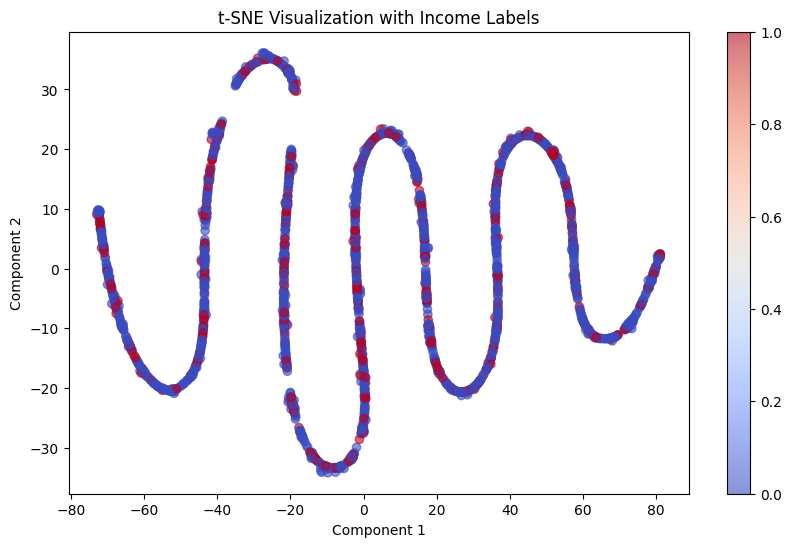

In [55]:
# Let's say your income labels were encoded like this:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df_data['salary'])  # or 'income'

# Sample (only if you sampled features too)
y_sample = y[df_data.index.isin(X_small.index)]

# Plot with labels as color
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='coolwarm', alpha=0.6)
plt.colorbar()
plt.title("t-SNE Visualization with Income Labels")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


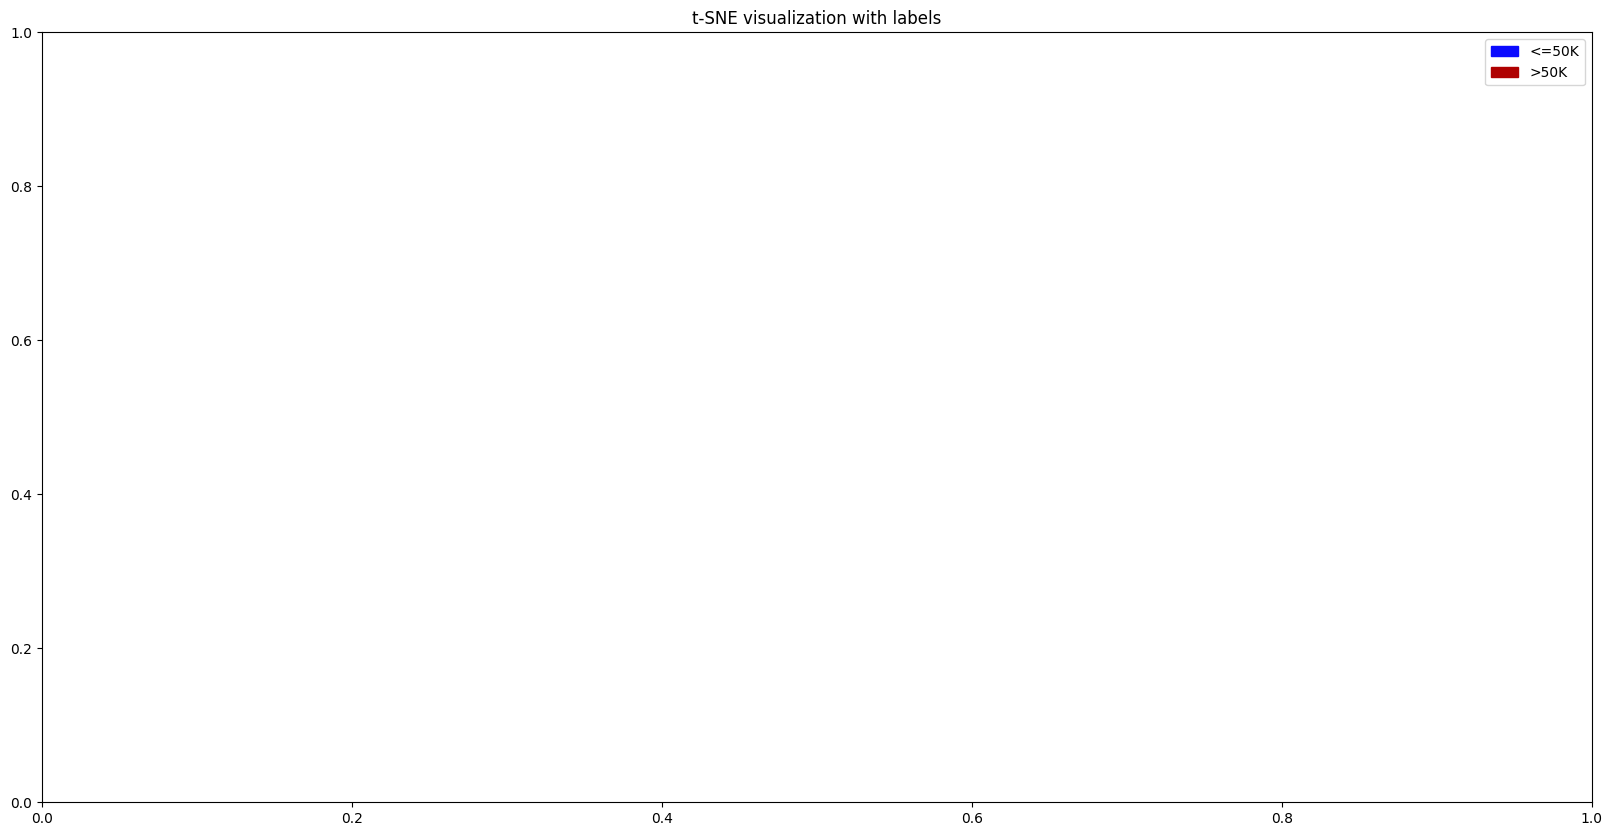

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create legend handles
blue_patch = mpatches.Patch(color='#0A0AFF', label='<=50K')
red_patch = mpatches.Patch(color='#AF0000', label='>50K')

plt.figure(figsize=(20, 10))
# Your plotting code here, e.g. plt.scatter(...)

# Add legend
plt.legend(handles=[blue_patch, red_patch])
plt.title("t-SNE visualization with labels")
plt.show()


In [57]:
from sklearn.ensemble import RandomForestClassifier


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Predict
ypred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, ypred))


Accuracy: 0.8602794411177644


In [59]:
from sklearn.ensemble import GradientBoostingClassifier


In [60]:
from sklearn.metrics import confusion_matrix


In [61]:
# Train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train, y_train)

# Predict on test set
ypred = gbc.predict(X_test)

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))
print("\nClassification Report:\n", classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score:", roc_auc_score(y_test, ypred))

# ROC Curve
gbc_fp, gbc_tp, gbc_threshold = roc_curve(y_test, ypred)
print("Thresholds:", gbc_threshold)


Confusion Matrix:
 [[4700  242]
 [ 599  972]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.81      6513
weighted avg       0.87      0.87      0.86      6513

Accuracy Score: 0.8708736373407032
Recall Score: 0.6187141947803947
Precision Score: 0.800658978583196
ROC AUC Score: 0.7848730828211969
Thresholds: [inf  1.  0.]


In [62]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
ypred = abc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
abc_fp, abc_tp, abc_threshold = roc_curve(y_test, ypred)
print("Threshold:", abc_threshold)

[[4683  259]
 [ 650  921]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4942
           1       0.78      0.59      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Accuracy Score: 0.8604329801934593
Recall Score: 0.5862507956715468
Precision Score: 0.7805084745762711
ROC AUC Score:  0.7669214318301077
Threshold: [inf  1.  0.]


NameError: name 'rf_fp' is not defined

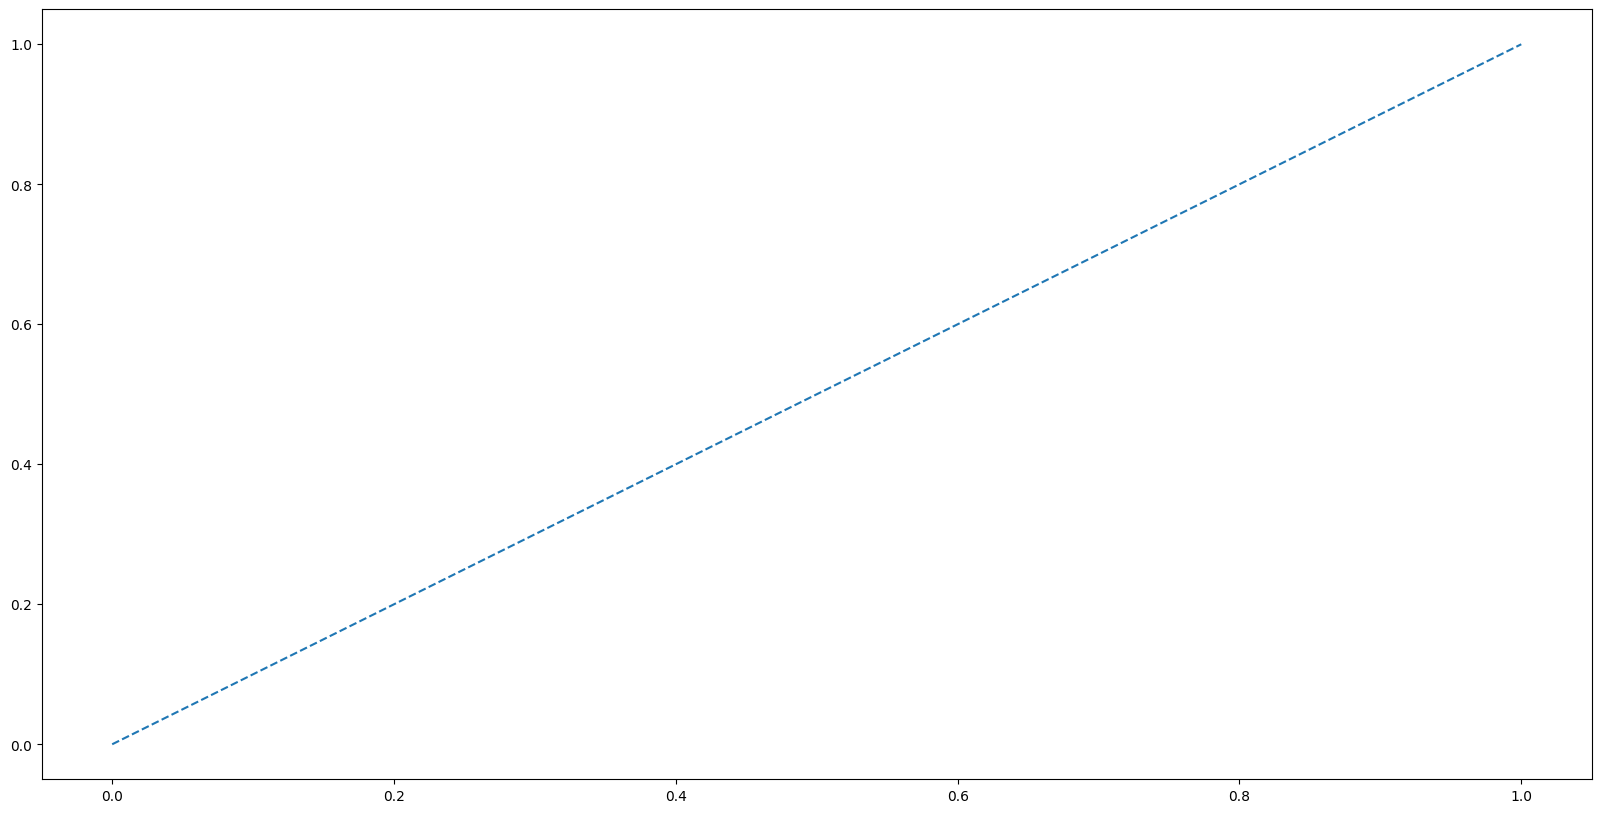

In [63]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(rf_fp, rf_tp, color="red", label = "Random Forest")
plt.plot(gbc_fp, gbc_tp, color="green", label = "Gradient Booting")
plt.plot(abc_fp, abc_tp, color="blue", label = "Ada Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [ ]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
0,age,0.224647
8,capital-gain,0.130645
5,relationship,0.114418
10,hours-per-week,0.112314
2,education,0.102435
4,occupation,0.094305
3,marital-status,0.068784
1,workclass,0.052675
9,capital-loss,0.045608
11,country,0.021752


Text(0.5, 1.0, 'Plot Feature Importances')

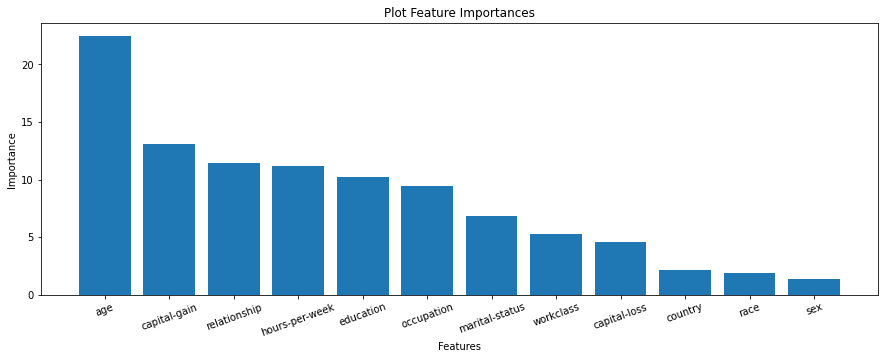

In [ ]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

In [ ]:
pickle_out = open("model1.pkl", "wb")
pickle.dump(abc, pickle_out)
pickle_out.close()